Initial Fluid Height :0.3000 m
['-0.000191', '0.557', '1.28', '2', '2.73', '3.47', '4.21', '4.96', '5.71', '6.46', '7.23', '7.99', '8.77', '9.55', '10.3', '11.1', '11.9', '12.7', '13.5', '14.3', '15.2', '16', '16.8', '17.6', '18.5', '19.3', '20.2', '21.1', '21.9', '22.8', '23.7', '24.6', '25.4', '26.3', '27.2', '28.2', '29.1', '30']
['73.6', '72', '70', '68', '66', '64', '62', '60', '58', '56', '54', '52', '50', '48', '46', '44', '42', '40', '38', '36', '34', '32', '30', '28', '26', '24', '22', '20', '18', '16', '14', '12', '10', '8', '6', '4', '2', '0']


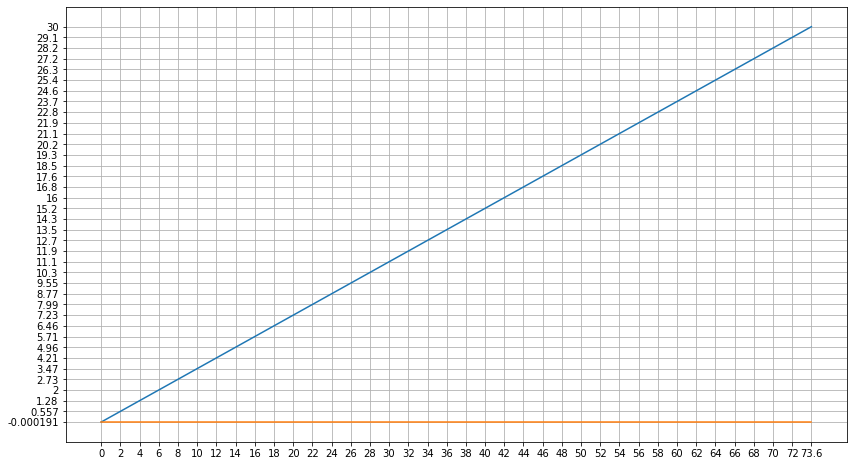

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci 
import pandas as pd 
import math 

# set up constants 
mu = 1.0e-3 #kg/m s viscocity 
rho = 1000.0 #Kg/m^3 fluid density 
d_tube = 0.953E-3 # inner diameter of the tube 
l_tube = 2.000 #Length of the tubing 
tc_area = np.pi*(100.0*d_tube/2)**2 #Ac tube crossectional area 
p1 = 101325.0 #Atmospheric pressure in pascals 
p2 = 102391.6 #Venous pressure in pascals 
grav = 9.81 # gravity in m/s^2 
sa = (500.0/30.0)*(1/100.0)**2 #bag crossectional area 
vtot = 500.0 # total volume of the IV bag 
icount = 0 
h0 = 0.3 #initial height of the fluid in the IV bag in meters 
H = 1.0 #height of the IV bag relative to the patients arm 
h1 = 2.0 #initialize the the equation 

t = 0 # set up time values 
dt = .05 #set up time steps 

sigfigs = 4 #set sig figs for the problem 

epi = 0.000000001 #dictate a tolerance 
tol = 20 #define an initial tol 

x = h0 

def v2(x): #define a function to solve for velocity 
    a = 1.0 
    b = (32.0*mu*l_tube/(rho*d_tube**2))
    c = -(grav*(x+H))
    vel = (-b + math.sqrt(b**2-4.0*a*c))/(2.0*a)
    return vel 

vmax = v2(h0)*60.0*100.0 #solve max velocity 
vmin = v2(0.0)*60.0*100  #solve min velocity 

# print(vmax)
# print(vmin)
# print(tc_area)

qmax = vmax*tc_area #solve for q max
qmin = vmin*tc_area #solve for q min 

tmin = vtot/qmax #solve for t min 
tmax = vtot/qmin #solve for t max 

#creating a final table 

L_time = ['%.*g'%(sigfigs,tmin),'%.*g'%(sigfigs,tmax)]
L_header = ['Min Time','Max Time', 'Actual Time']

#create lists for plotting every minute 

L_timep =['%.*g'%(sigfigs-1,t/60.0)]
L_heightp =['%.*g'%(sigfigs-1,h0*100.0)]

# print("Minimum time: %f " % tmin )
# print(f'Maximum time :{tmax:.4f} minutes')

print(f'Initial Fluid Height :{h0:.4f} m')

ptime = 0 #initialize time 
jcount = 0 #initialize count

while (tol>epi): 
    icount = icount + 1
    jcount = jcount + 1 
    dd = -(v2(h0)*np.pi*(d_tube/2)**2)/sa
    h1 = h0 + dt*dd
    
    tol = abs(h1-h0)/h1 
    h0 = h1 
    time = icount*dt
    ptime = jcount*dt 
    if (ptime == 120.0):
        L_timep.append('%.*g'%(sigfigs-1,time/60))
        #print(time/60)
        L_heightp.append('%.*g'%(sigfigs-1,h0*100.0))
        jcount = 0 
        

L_timep.append('%.*g'%(sigfigs-1,time/60))
L_heightp.append('%.*g'%(sigfigs-1,h0*100.0))
L_time.append('%.*g'%(sigfigs-1,time/60))

L_rheightp = list(reversed(L_heightp))
L_rtimep = list(reversed(L_timep))
x_ax = np.linspace(0,74,10)
fig = plt.figure(figsize = (14,8))
plt.plot(L_timep,L_rheightp)
plt.grid(True)
plt.plot(L_timep,np.zeros(len(L_timep)))
#print(x_ax)
#print(np.zeros(len(x_ax)))

print(L_rheightp)
print(L_rtimep)

